## Analyzing Used Car Listings - eBay Kleinanzeigen Dataset

This notebook explores and cleans a dataset of used car listings from eBay Kleinanzeigen (Germany).  
We aim to prepare the data for analysis and uncover factors that affect used car prices.

Dataset: [Kaggle - Uncovering Factors That Affect Used Car Prices](https://www.kaggle.com/datasets/thedevastator/uncovering-factors-that-affect-used-car-prices/data)

## Project Overview

- **Goal:** Clean and analyze used car listings to understand price drivers.
- **Steps:** Data loading, inspection, cleaning, outlier removal, and preparation for further analysis.

## 1. Data Loading

We start by importing the necessary libraries and loading the dataset and its data dictionary.

In [ ]:
# Install required packages (uncomment if running in a new environment)
# !pip install pandas plotly termcolor

In [ ]:
# Import libraries for data manipulation, colored output, and visualization
import pandas as pd
from termcolor import colored
import plotly.express as px

In [ ]:
# Load the data dictionary for column descriptions
df_dict = pd.read_csv("autos_dict.csv")
print("The data dictionary provided with data is as follows: \n", df_dict.to_markdown())

The data dictionary provided with data is as follows: 
 |    | colum_name          |  description                                                               |
|---:|:--------------------|:---------------------------------------------------------------------------|
|  0 | dateCrawled         | When this ad was first crawled. All field-values are taken from this date. |
|  1 | name                | Name of the car.                                                           |
|  2 | seller              | Whether the seller is private or a dealer.                                 |
|  3 | offerType           | The type of listing                                                        |
|  4 | price               | The price on the ad to sell the car.                                       |
|  5 | abtest              | Whether the listing is included in an A/B test.                            |
|  6 | vehicleType         | The vehicle Type.                                                  

In [ ]:
# Load the main dataset
df = pd.read_csv("autos.csv")

# Drop the first column if it's an unnamed index column
df = df[df.columns[1:]]

# Display basic info and the first few rows
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371528 entries, 0 to 371527
Data columns (total 20 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   dateCrawled          371528 non-null  object
 1   name                 371528 non-null  object
 2   seller               371528 non-null  object
 3   offerType            371528 non-null  object
 4   price                371528 non-null  int64 
 5   abtest               371528 non-null  object
 6   vehicleType          333659 non-null  object
 7   yearOfRegistration   371528 non-null  int64 
 8   gearbox              351319 non-null  object
 9   powerPS              371528 non-null  int64 
 10  model                351044 non-null  object
 11  kilometer            371528 non-null  int64 
 12  monthOfRegistration  371528 non-null  int64 
 13  fuelType             338142 non-null  object
 14  brand                371528 non-null  object
 15  notRepairedDamage    299468 non-nu

dateCrawled                            name  seller offerType  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat   Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat   Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat   Angebot   
3  2016-03-17 16:54:04             GOLF_4_1_4__3TÃRER  privat   Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   

   price abtest vehicleType  yearOfRegistration    gearbox  powerPS  model  \
0    480   test         NaN                1993    manuell        0   golf   
1  18300   test       coupe                2011    manuell      190    NaN   
2   9800   test         suv                2004  automatik      163  grand   
3   1500   test  kleinwagen                2001    manuell       75   golf   
4   3600   test  kleinwagen                2008    manuell       69  fabia   

   kilometer  monthOfRegistration fuelType       brand notRepairedDamage  \
0     150000                    0   benzin  volkswagen               NaN   
1     125000                    5   diesel        audi                ja   
2     125000                    8   diesel        jeep               NaN   
3     150000                    6   benzin  volkswagen              nein   
4      90000                    7   diesel       skoda              nein   

           dateCreated  nrOfPictures  postalCode             lastSeen  
0  2016-03-24 00:00:00             0       70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00             0       66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00             0       90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00             0       91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00             0       60437  2016-04-06 10:17:21

In [ ]:
# Analyze column types and missing values

shape = df.shape[1]
type_0_name = str(df.dtypes.value_counts().index[0])
type_0_total = df.dtypes.value_counts().values[0]
type_1_name = df.dtypes.value_counts().index[1]
type_1_total = df.dtypes.value_counts().values[1]
null_columns_count = df.isnull().any().sum()
null_value = ((df.isnull().sum() / df.notna().sum()).round(3) * 100).max().round()

In [ ]:
# Print a summary of the dataset's structure and missing values

print(
    "Our dataset contains",
    colored(shape, attrs=['bold']),
    "columns, which",
    colored(type_0_total, attrs=['bold']),
    "are stored as",
    colored(type_0_name, attrs=['bold']),
    "and",
    colored(type_1_total, attrs=['bold']),
    "are stored as",
    colored(type_1_name, attrs=['bold']),
    ".",
)
print(
    "There are",
    colored(null_columns_count, attrs=['bold']),
    "columns with null values,",
    "but no columns have more than",
    colored(null_value, attrs=['bold']),
    colored("%", attrs=['bold']), "of null values",
)
print(colored("There are some columns that contain dates stored as strings.", attrs=['underline']))

Our dataset contains 20 columns, which 13 are stored as object and 7 are stored as int64 .
There are 5 columns with null values, but no columns have more than 24.0 % of null values
There are some columns that contain dates stored as strings.


## 2. Column Renaming

Rename columns for clarity and consistency, matching the data dictionary.

In [ ]:
# Show current column names
df.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [ ]:
# Rename columns to more descriptive names
df.columns = [
    "date_crawled",
    "name",
    "seller",
    "offer_type",
    "price",
    "ab_test",
    "vehicle_type",
    "registration_year",
    "gearbox",
    "power_ps",
    "model",
    "odometer_km",
    "registration_month",
    "fuel_type",
    "brand",
    "unrepaired_damage",
    "ad_created",
    "num_photos",
    "postal_code",
    "last_seen",
]
df.head()

date_crawled                            name  seller offer_type  \
0  2016-03-24 11:52:17                      Golf_3_1.6  privat    Angebot   
1  2016-03-24 10:58:45            A5_Sportback_2.7_Tdi  privat    Angebot   
2  2016-03-14 12:52:21  Jeep_Grand_Cherokee_"Overland"  privat    Angebot   
3  2016-03-17 16:54:04             GOLF_4_1_4__3TÃRER  privat    Angebot   
4  2016-03-31 17:25:20  Skoda_Fabia_1.4_TDI_PD_Classic  privat    Angebot   

   price ab_test vehicle_type  registration_year    gearbox  power_ps  model  \
0    480    test          NaN               1993    manuell         0   golf   
1  18300    test        coupe               2011    manuell       190    NaN   
2   9800    test          suv               2004  automatik       163  grand   
3   1500    test   kleinwagen               2001    manuell        75   golf   
4   3600    test   kleinwagen               2008    manuell        69  fabia   

   odometer_km  registration_month fuel_type       brand unrepaired_damage  \
0       150000                   0    benzin  volkswagen               NaN   
1       125000                   5    diesel        audi                ja   
2       125000                   8    diesel        jeep               NaN   
3       150000                   6    benzin  volkswagen              nein   
4        90000                   7    diesel       skoda              nein   

            ad_created  num_photos  postal_code            last_seen  
0  2016-03-24 00:00:00           0        70435  2016-04-07 03:16:57  
1  2016-03-24 00:00:00           0        66954  2016-04-07 01:46:50  
2  2016-03-14 00:00:00           0        90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00           0        91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00           0        60437  2016-04-06 10:17:21

## 3. Data Exploration and Cleaning

Let's explore the data to identify columns that need cleaning or removal.

### Initial Data Exploration

We use `describe(include='all')` to get a sense of the data, especially for categorical columns.

In [ ]:
# Describe all columns, including non-numeric ones
df.describe(include='all')

date_crawled         name  seller offer_type         price  \
count                371528       371528  371528     371528  3.715280e+05   
unique               280500       233531       2          2           NaN   
top     2016-03-24 14:49:47  Ford_Fiesta  privat    Angebot           NaN   
freq                      7          657  371525     371516           NaN   
mean                    NaN          NaN     NaN        NaN  1.729514e+04   
std                     NaN          NaN     NaN        NaN  3.587954e+06   
min                     NaN          NaN     NaN        NaN  0.000000e+00   
25%                     NaN          NaN     NaN        NaN  1.150000e+03   
50%                     NaN          NaN     NaN        NaN  2.950000e+03   
75%                     NaN          NaN     NaN        NaN  7.200000e+03   
max                     NaN          NaN     NaN        NaN  2.147484e+09   

       ab_test vehicle_type  registration_year  gearbox       power_ps  \
count   371528       333659      371528.000000   351319  371528.000000   
unique       2            8                NaN        2            NaN   
top       test    limousine                NaN  manuell            NaN   
freq    192585        95894                NaN   274214            NaN   
mean       NaN          NaN        2004.577997      NaN     115.549477   
std        NaN          NaN          92.866598      NaN     192.139578   
min        NaN          NaN        1000.000000      NaN       0.000000   
25%        NaN          NaN        1999.000000      NaN      70.000000   
50%        NaN          NaN        2003.000000      NaN     105.000000   
75%        NaN          NaN        2008.000000      NaN     150.000000   
max        NaN          NaN        9999.000000      NaN   20000.000000   

         model    odometer_km  registration_month fuel_type       brand  \
count   351044  371528.000000       371528.000000    338142      371528   
unique     251            NaN                 NaN         7          40   
top       golf            NaN                 NaN    benzin  volkswagen   
freq     30070            NaN                 NaN    223857       79640   
mean       NaN  125618.688228            5.734445       NaN         NaN   
std        NaN   40112.337051            3.712412       NaN         NaN   
min        NaN    5000.000000            0.000000       NaN         NaN   
25%        NaN  125000.000000            3.000000       NaN         NaN   
50%        NaN  150000.000000            6.000000       NaN         NaN   
75%        NaN  150000.000000            9.000000       NaN         NaN   
max        NaN  150000.000000           12.000000       NaN         NaN   

       unrepaired_damage           ad_created  num_photos   postal_code  \
count             299468               371528    371528.0  371528.00000   
unique                 2                  114         NaN           NaN   
top                 nein  2016-04-03 00:00:00         NaN           NaN   
freq              263182                14450         NaN           NaN   
mean                 NaN                  NaN         0.0   50820.66764   
std                  NaN                  NaN         0.0   25799.08247   
min                  NaN                  NaN         0.0    1067.00000   
25%                  NaN                  NaN         0.0   30459.00000   
50%                  NaN                  NaN         0.0   49610.00000   
75%                  NaN                  NaN         0.0   71546.00000   
max                  NaN                  NaN         0.0   99998.00000   

                  last_seen  
count                371528  
unique               182806  
top     2016-04-06 13:45:54  
freq                     17  
mean                    NaN  
std                     NaN  
min                     NaN  
25%                     NaN  
50%                     NaN  
75%                     NaN  
max                     NaN

**Observations:**

- Some text columns (`seller`, `offer_type`) have only one unique value.
- The `num_photos` column looks odd and needs further investigation.

In [ ]:
# Check the distribution of values in the num_photos column
df["num_photos"].value_counts()

num_photos
0    371528
Name: count, dtype: int64

It looks like the **num_photos** column has 0 for every row.  
We'll drop this column, plus the other two we noted as mostly one value.

In [ ]:
# Drop columns that do not provide useful information
df = df.drop(["num_photos", "seller", "offer_type"], axis=1)

### Outlier Detection and Removal (Price)

We use the Interquartile Range (IQR) method to detect and remove outliers in the `price` column.

In [ ]:
# Function to detect outliers using the IQR method
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return (data < lower_bound) | (data > upper_bound)

# Detect outliers in the price column
outliers = detect_outliers_iqr(df['price'])

print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 28108


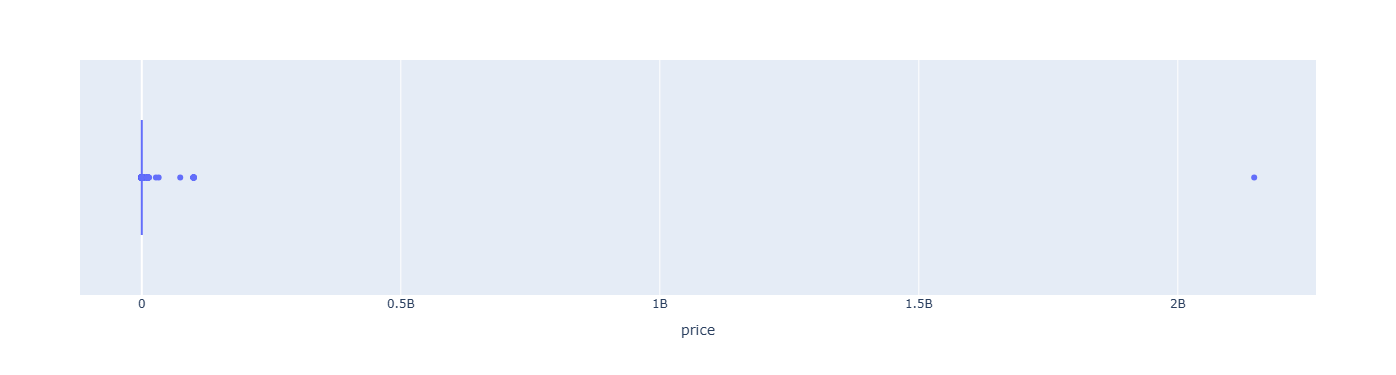

In [ ]:
# Visualize price outliers with a box plot
fig = px.box(df, x="price", points="suspectedoutliers")
fig.show()

Original dataset size: 371528
Cleaned dataset size: 343420


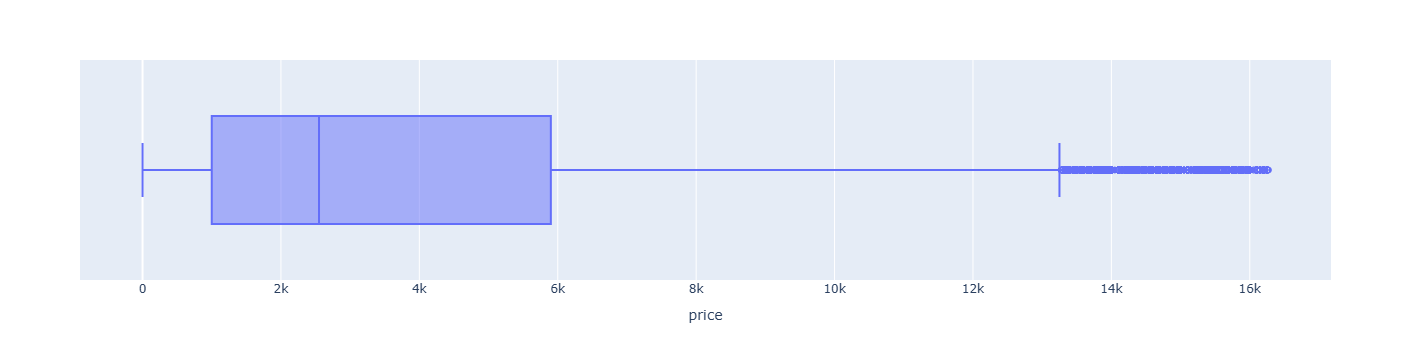

In [ ]:
# Remove outliers from the dataset
data_cleaned = df[~outliers].copy()
print(f"Original dataset size: {len(df)}")
print(f"Cleaned dataset size: {len(data_cleaned)}")

# Visualize the cleaned price distribution
fig = px.box(data_cleaned, x="price", points="suspectedoutliers")
fig.show()

### Exploring the date columns

Several columns contain date information, but are stored as strings.

In [ ]:
# Preview the date columns
data_cleaned.head()

date_crawled                                               name  \
0  2016-03-24 11:52:17                                         Golf_3_1.6   
2  2016-03-14 12:52:21                     Jeep_Grand_Cherokee_"Overland"   
3  2016-03-17 16:54:04                                GOLF_4_1_4__3TÃRER   
4  2016-03-31 17:25:20                     Skoda_Fabia_1.4_TDI_PD_Classic   
5  2016-04-04 17:36:23  BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...   

   price ab_test vehicle_type  registration_year    gearbox  power_ps  model  \
0    480    test          NaN               1993    manuell         0   golf   
2   9800    test          suv               2004  automatik       163  grand   
3   1500    test   kleinwagen               2001    manuell        75   golf   
4   3600    test   kleinwagen               2008    manuell        69  fabia   
5    650    test    limousine               1995    manuell       102    3er   

   odometer_km  registration_month fuel_type       brand unrepaired_damage  \
0       150000                   0    benzin  volkswagen               NaN   
2       125000                   8    diesel        jeep               NaN   
3       150000                   6    benzin  volkswagen              nein   
4        90000                   7    diesel       skoda              nein   
5       150000                  10    benzin         bmw                ja   

            ad_created  postal_code            last_seen  
0  2016-03-24 00:00:00        70435  2016-04-07 03:16:57  
2  2016-03-14 00:00:00        90480  2016-04-05 12:47:46  
3  2016-03-17 00:00:00        91074  2016-03-17 17:40:17  
4  2016-03-31 00:00:00        60437  2016-04-06 10:17:21  
5  2016-04-04 00:00:00        33775  2016-04-06 19:17:07

The following columns contain date information:

- `date_crawled`
- `registration_month`
- `registration_year`
- `ad_created`
- `last_seen`

The non-registration dates are stored as strings and need to be converted to datetime objects.

In [ ]:
# Show the first 5 rows of the date columns
data_cleaned[['date_crawled','ad_created','last_seen']][0:5]

date_crawled           ad_created            last_seen
0  2016-03-24 11:52:17  2016-03-24 00:00:00  2016-04-07 03:16:57
2  2016-03-14 12:52:21  2016-03-14 00:00:00  2016-04-05 12:47:46
3  2016-03-17 16:54:04  2016-03-17 00:00:00  2016-03-17 17:40:17
4  2016-03-31 17:25:20  2016-03-31 00:00:00  2016-04-06 10:17:21
5  2016-04-04 17:36:23  2016-04-04 00:00:00  2016-04-06 19:17:07

In [ ]:
# Convert string date columns to pandas datetime objects
data_cleaned[['date_crawled','ad_created','last_seen']] = data_cleaned[['date_crawled','ad_created','last_seen']].astype('datetime64[ns]')

In [ ]:
# Check the dataframe info to confirm date conversion
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 343420 entries, 0 to 371526
Data columns (total 17 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   date_crawled        343420 non-null  datetime64[ns]
 1   name                343420 non-null  object        
 2   price               343420 non-null  int64         
 3   ab_test             343420 non-null  object        
 4   vehicle_type        306243 non-null  object        
 5   registration_year   343420 non-null  int64         
 6   gearbox             323737 non-null  object        
 7   power_ps            343420 non-null  int64         
 8   model               324076 non-null  object        
 9   odometer_km         343420 non-null  int64         
 10  registration_month  343420 non-null  int64         
 11  fuel_type           310835 non-null  object        
 12  brand               343420 non-null  object        
 13  unrepaired_damage   272991 non-nul

## Dealing with Incorrect Registration Year Data

Some cars have implausible registration years. We'll detect and remove these outliers.

In [ ]:
# Describe the registration_year column to check for odd values
data_cleaned["registration_year"].describe()

count    343420.000000
mean       2004.034669
std          89.309235
min        1000.000000
25%        1999.000000
50%        2003.000000
75%        2007.000000
max        9999.000000
Name: registration_year, dtype: float64

In [ ]:
# Print the min and max registration year for inspection
print("The year that the car was first registered will likely indicate the age of the car. Looking at this column, we note some odd values. The minimum value is", colored(data_cleaned["registration_year"].min(), attrs=['underline']), "and the maximum is", colored(data_cleaned["registration_year"].max(), attrs=['underline']))

The year that the car was first registered will likely indicate the age of the car. Looking at this column, we note some odd values. The minimum value is 1000 and the maximum is 9999


In [ ]:
# Preview the cleaned data
data_cleaned.head()

date_crawled                                               name  \
0 2016-03-24 11:52:17                                         Golf_3_1.6   
2 2016-03-14 12:52:21                     Jeep_Grand_Cherokee_"Overland"   
3 2016-03-17 16:54:04                                GOLF_4_1_4__3TÃRER   
4 2016-03-31 17:25:20                     Skoda_Fabia_1.4_TDI_PD_Classic   
5 2016-04-04 17:36:23  BMW_316i___e36_Limousine___Bastlerfahrzeug__Ex...   

   price ab_test vehicle_type  registration_year    gearbox  power_ps  model  \
0    480    test          NaN               1993    manuell         0   golf   
2   9800    test          suv               2004  automatik       163  grand   
3   1500    test   kleinwagen               2001    manuell        75   golf   
4   3600    test   kleinwagen               2008    manuell        69  fabia   
5    650    test    limousine               1995    manuell       102    3er   

   odometer_km  registration_month fuel_type       brand unrepaired_damage  \
0       150000                   0    benzin  volkswagen               NaN   
2       125000                   8    diesel        jeep               NaN   
3       150000                   6    benzin  volkswagen              nein   
4        90000                   7    diesel       skoda              nein   
5       150000                  10    benzin         bmw                ja   

  ad_created  postal_code           last_seen  
0 2016-03-24        70435 2016-04-07 03:16:57  
2 2016-03-14        90480 2016-04-05 12:47:46  
3 2016-03-17        91074 2016-03-17 17:40:17  
4 2016-03-31        60437 2016-04-06 10:17:21  
5 2016-04-04        33775 2016-04-06 19:17:07

In [ ]:
# Detect outliers
outliers = detect_outliers_iqr(data_cleaned['registration_year'])

print(f"Number of outliers detected: {sum(outliers)}")

Number of outliers detected: 6477


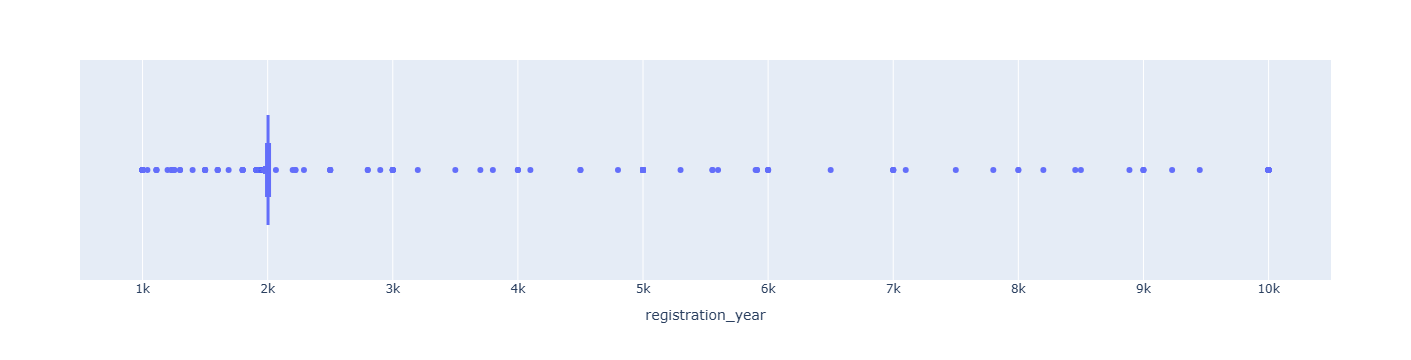

In [ ]:
# Visualize registration_year outliers with a box plot
fig = px.box(data_cleaned, x="registration_year", points="suspectedoutliers")
fig.show()

Original dataset size: 343420
Cleaned dataset size: 336943


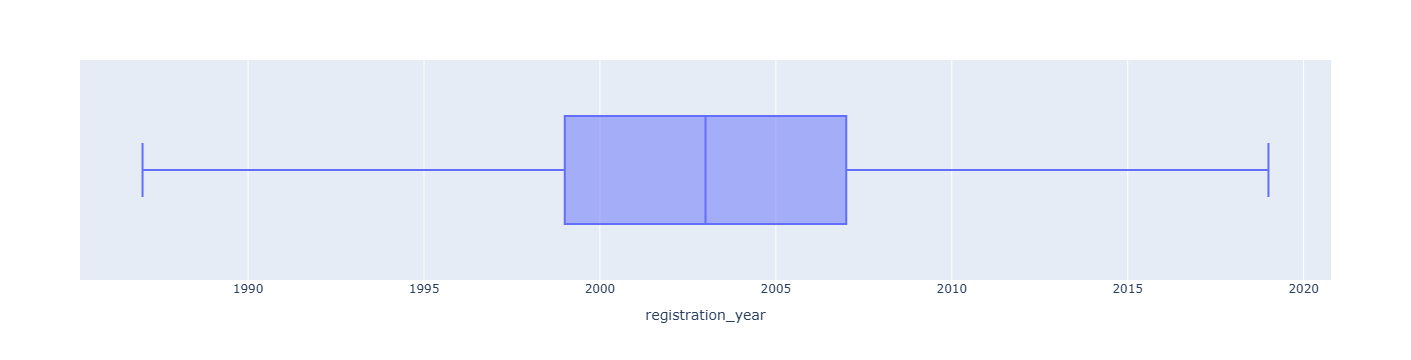

In [ ]:
# Remove registration_year outliers
data_cleaned = data_cleaned[~outliers].copy()

print(f"Original dataset size: {len(data_cleaned)}")
print(f"Cleaned dataset size: {len(data_cleaned)}")

# Visualize the cleaned registration_year distribution
fig = px.box(data_cleaned, x="registration_year", points="suspectedoutliers")
fig.show()

In [ ]:
# Ensure registration_year does not exceed the year the ad was crawled
print("Despite removing the outliers, the registratio_year can't be higher than", colored(max(data_cleaned['date_crawled'].dt.year), attrs=['underline']))

Despite removing the outliers, the registratio_year can't be higher than 2016


In [ ]:
# Filter out any remaining implausible registration_year values
data_cleaned = data_cleaned[data_cleaned['registration_year']<= max(data_cleaned['date_crawled'].dt.year)]

# The cleaned dataset is now ready for further analysis!